In [2]:
import pandas as pd

In [3]:
covid_df = pd.read_csv("COVID_Parcel_Business.csv")

In [8]:
unique_week = set(covid_df['THE_WEEK'].unique())
print(f"Unique Years: {unique_week}")

Unique Years: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53}


In [29]:
unique_customers_per_year = covid_df.groupby('THE_YEAR')['FakeCustomerID'].nunique()
print(unique_customers_per_year)

THE_YEAR
2018    1025
2019    1061
2020    1046
2021    1014
Name: FakeCustomerID, dtype: int64


### Dividing the Customers into Categories


In [125]:
# Separate the dataset into two different DataFrames for the years 2019 and 2020
covid_df_2019 = covid_df[covid_df['THE_YEAR'] == 2019]
covid_df_2020 = covid_df[covid_df['THE_YEAR'] == 2020]

# Group by 'FakeCustomerID' and sum the volumes for 2019
customer_volume_2019 = covid_df_2019.groupby('FakeCustomerID')['VOLUME'].sum()
customer_volume_2020 = covid_df_2020.groupby('FakeCustomerID')['VOLUME'].sum()
# Define a function to determine customer size based on the sum of 2019 volume
def get_customer_size(volume):
    if volume > 500000:
        return 'Enterprise'
    elif 200000 <= volume <= 500000:
        return 'Large'
    elif 10000 <= volume < 200000:
        return 'Medium'
    elif 1000 <= volume < 10000:
        return 'Small'


# Apply the function to create the 'Customer_Size' column
covid_df['Customer_Size_2019'] = covid_df['FakeCustomerID'].map(customer_volume_2019.apply(get_customer_size))
covid_df['Customer_Size_2020'] = covid_df['FakeCustomerID'].map(customer_volume_2020.apply(get_customer_size))
print(covid_df.head())

   FakeCustomerID  THE_YEAR  THE_WEEK  VOLUME Customer_Size       Date  \
0          718117      2021         1       8        Medium 2021-01-03   
1          718117      2020         7     257        Medium 2020-02-16   
2          718117      2019        39     141        Medium 2019-09-29   
3          718117      2018         1      14        Medium 2018-01-07   
4          718117      2021         2     192        Medium 2021-01-10   

  Customer_Size_2019 Customer_Size_2020  Week_Number  
0              Small             Medium           53  
1              Small             Medium            7  
2              Small             Medium           39  
3              Small             Medium            1  
4              Small             Medium            1  


###Comparing parcel volume by customer size


###Customer Group size change from 2019 to 2020

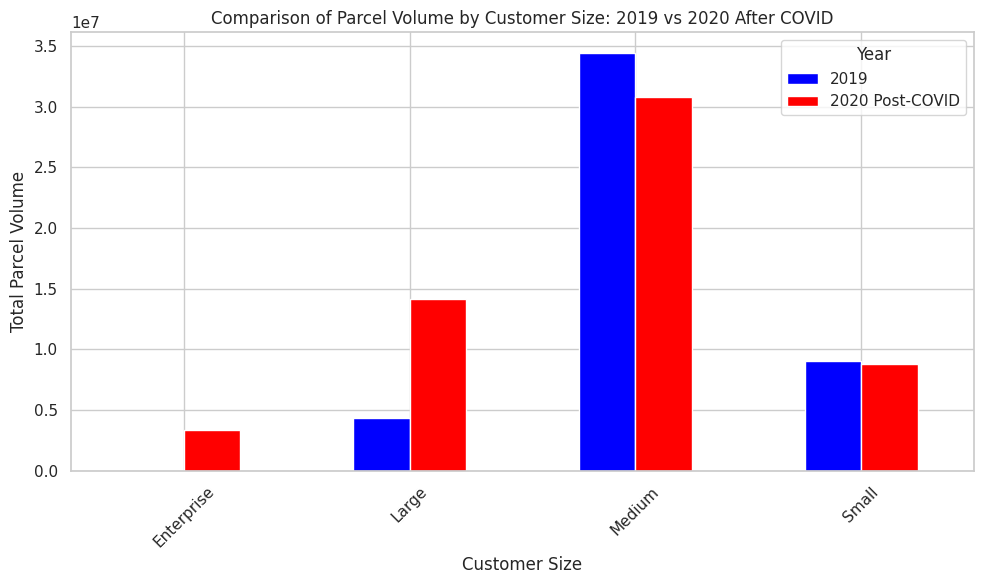

In [126]:
# Applying classifications for 2019 and 2020
covid_df['Customer_Size_2019'] = covid_df[covid_df['THE_YEAR'] == 2019]['VOLUME'].apply(get_customer_size)
covid_df['Customer_Size_2020'] = covid_df[covid_df['THE_YEAR'] == 2020]['VOLUME'].apply(get_customer_size)

# Group by size and sum volumes for both years
volume_by_group_2019 = covid_df[covid_df['THE_YEAR'] == 2019].groupby('Customer_Size_2019')['VOLUME'].sum()
volume_by_group_2020 = covid_df[(covid_df['THE_YEAR'] == 2020) & (covid_df['THE_WEEK'] > 13)].groupby('Customer_Size_2020')['VOLUME'].sum()

# Create a dataframe for plotting
data_for_plotting = pd.DataFrame({'2019': volume_by_group_2019, '2020 Post-COVID': volume_by_group_2020})
data_for_plotting = data_for_plotting.fillna(0)  # Fill missing values with 0 for a fair comparison

# Plotting the comparison
data_for_plotting.plot(kind='bar', figsize=(10, 6), color=['blue', 'red'])
plt.title('Comparison of Parcel Volume by Customer Size: 2019 vs 2020 After COVID')
plt.xlabel('Customer Size')
plt.ylabel('Total Parcel Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


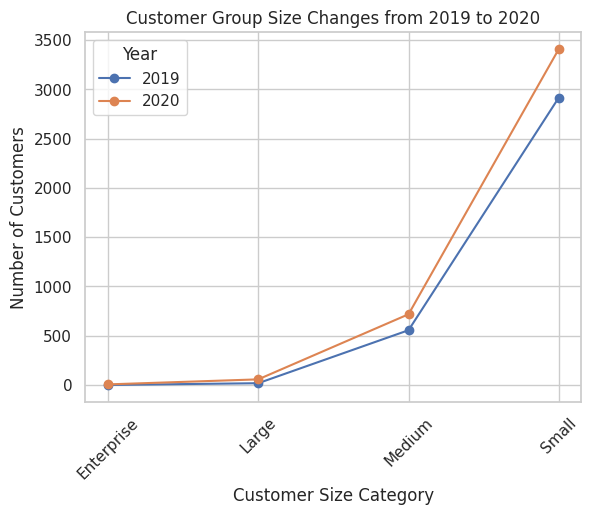

In [127]:
# Count the number of customers in each size category for both years
customer_counts_2019 = covid_df['Customer_Size_2019'].value_counts().sort_index()
customer_counts_2020 = covid_df['Customer_Size_2020'].value_counts().sort_index()

# Create a DataFrame for plotting
size_counts = pd.DataFrame({'2019': customer_counts_2019, '2020': customer_counts_2020}).fillna(0)

# Plotting the line graph
size_counts.plot(kind='line', marker='o')
plt.title('Customer Group Size Changes from 2019 to 2020')
plt.xlabel('Customer Size Category')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.xticks(range(len(size_counts.index)), size_counts.index, rotation=45)  # Set the x-ticks to the customer size categories
plt.legend(title='Year')
plt.show()


<ipython-input-128-af9aded9d889>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_2020_post_week13 = covid_df_2020[(covid_df_2020['THE_YEAR'] == 2020) & (covid_df['THE_WEEK'] > 12)]


Total Parcel Volume for 2019: 52823114
Total Parcel Volume for 2020 (Post-Week 13): 62768451


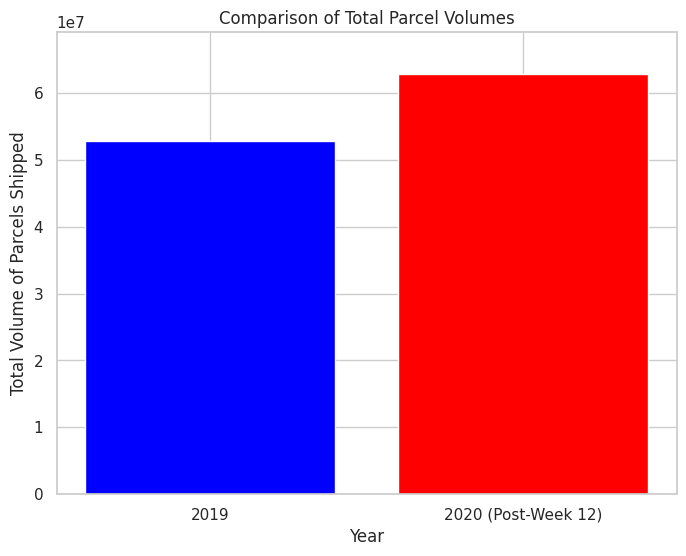

In [128]:
# Filter the 2020 data to include only the weeks after week 13
data_2020_post_week13 = covid_df_2020[(covid_df_2020['THE_YEAR'] == 2020) & (covid_df['THE_WEEK'] > 12)]

# Calculate total volume for 2019 and post-week 13 in 2020
total_volume_2019 = covid_df_2019['VOLUME'].sum()
total_volume_2020_post_week13 = data_2020_post_week13['VOLUME'].sum()

print("Total Parcel Volume for 2019:", total_volume_2019)
print("Total Parcel Volume for 2020 (Post-Week 13):", total_volume_2020_post_week13)

import matplotlib.pyplot as plt

# Data preparation
years = ['2019', '2020 (Post-Week 12)']
volumes = [total_volume_2019, total_volume_2020_post_week13]

# Creating the bar chart
plt.figure(figsize=(8, 6))
plt.bar(years, volumes, color=['blue', 'red'])
plt.title('Comparison of Total Parcel Volumes')
plt.xlabel('Year')
plt.ylabel('Total Volume of Parcels Shipped')
plt.ylim(0, max(volumes) * 1.1)  # Setting y-limit to be 10% greater than the max volume for better visualization
plt.show()



### total volume (by week as we can get peak week by it too) in 2020 vs 2019





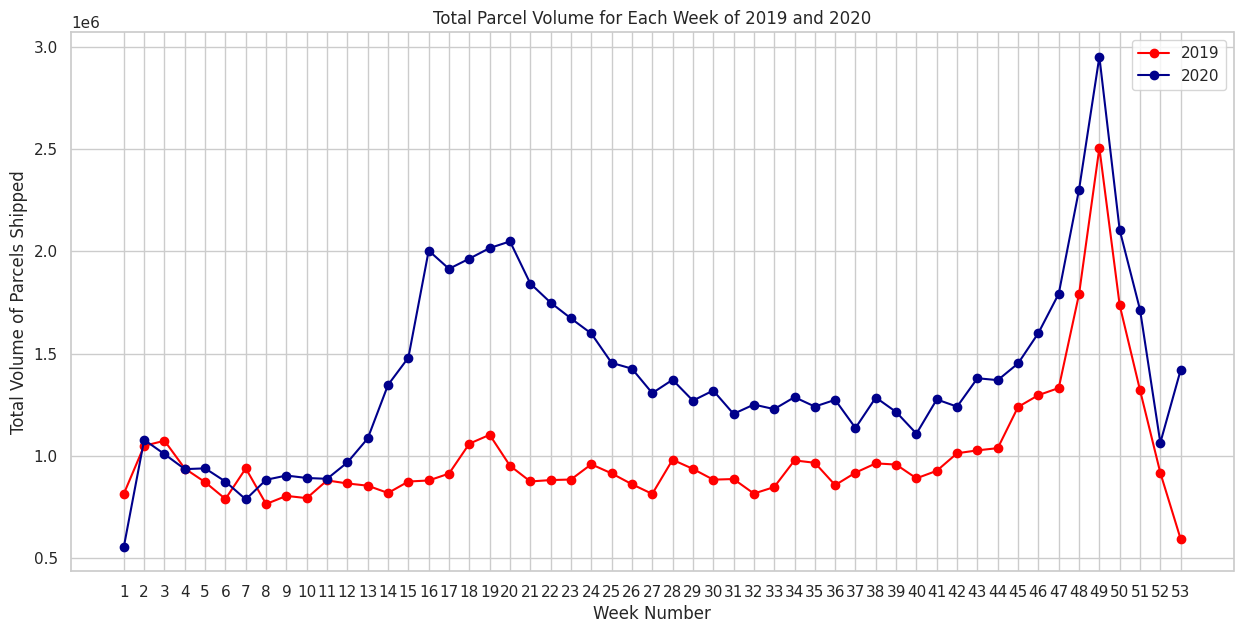

In [130]:
# Group by week number to get the total volume of parcels shipped each week for both 2019 and 2020
full_year_weekly_volumes_2019 = covid_df_2019.groupby('THE_WEEK')['VOLUME'].sum()
full_year_weekly_volumes_2020 = covid_df_2020.groupby('THE_WEEK')['VOLUME'].sum()

# Plotting both years on the same plot for comparison
plt.figure(figsize=(15, 7))
full_year_weekly_volumes_2019.plot(kind='line', marker='o', linestyle='-', color='red', label='2019')
full_year_weekly_volumes_2020.plot(kind='line', marker='o', linestyle='-', color='darkblue', label='2020')
plt.title('Total Parcel Volume for Each Week of 2019 and 2020')
plt.xlabel('Week Number')
plt.ylabel('Total Volume of Parcels Shipped')
plt.grid(True)
plt.xticks(range(1, 54))  # Assuming weeks go up to 53 as some years have 53 weeks
plt.legend()
plt.show()


###parcel volume by customer category

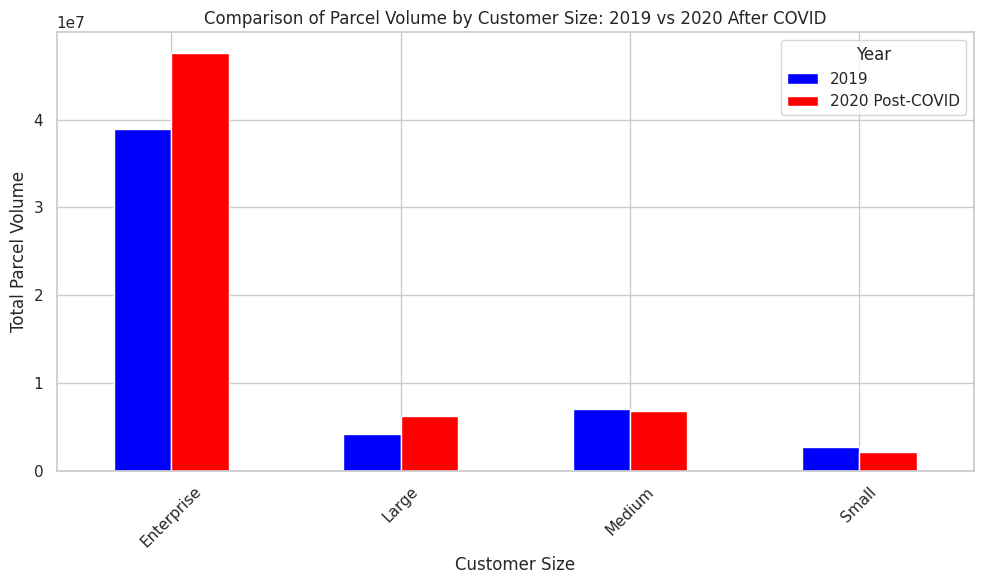

In [109]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Group the data by customer size for 2019 and sum the volumes, and for 2020 but after 13 week
volume_by_group_2019 = covid_df[covid_df['THE_YEAR'] == 2019].groupby('Customer_Size_2019')['VOLUME'].sum()
volume_by_group_2020 = covid_df[(covid_df['THE_YEAR'] == 2020) & (covid_df['THE_WEEK'] > 12)].groupby('Customer_Size_2020')['VOLUME'].sum()

# Create a dataframe for plotting
data_for_plotting = pd.DataFrame({'2019': volume_by_group_2019, '2020 Post-COVID': volume_by_group_2020})
data_for_plotting = data_for_plotting.fillna(0)  # Fill missing values with 0 for a fair comparison

# Plotting the comparison
data_for_plotting.plot(kind='bar', figsize=(10, 6), color=['blue', 'red'])
plt.title('Comparison of Parcel Volume by Customer Size: 2019 vs 2020 After COVID')
plt.xlabel('Customer Size')
plt.ylabel('Total Parcel Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


###Peak season comparison

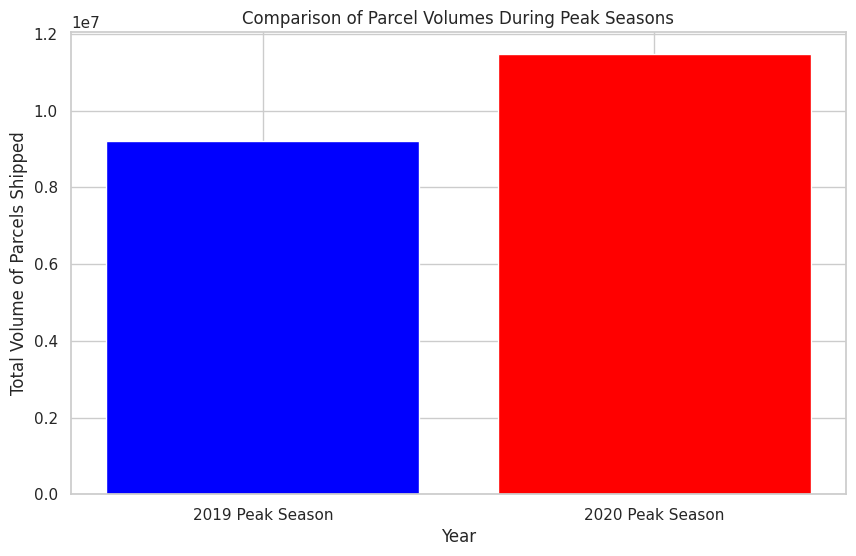

In [110]:
# Ensure that the 'THE_YEAR' and 'THE_WEEK' columns are of integer type for proper filtering
covid_df['THE_YEAR'] = covid_df['THE_YEAR'].astype(int)
covid_df['THE_WEEK'] = covid_df['THE_WEEK'].astype(int)

# Define the range of weeks that constitute the peak season
peak_weeks = range(44, 50)  # Weeks 44 to 49 inclusive

# Filter the dataset for entries within the peak season for the year 2019
peak_data_2019 = covid_df[(covid_df['THE_YEAR'] == 2019) & (covid_df['THE_WEEK'].isin(peak_weeks))]

# Similarly, filter the dataset for entries within the peak season for the year 2020
peak_data_2020 = covid_df[(covid_df['THE_YEAR'] == 2020) & (covid_df['THE_WEEK'].isin(peak_weeks))]

# Calculate the total volume of parcels shipped during the peak season for 2019
total_volume_2019 = peak_data_2019['VOLUME'].sum()

# Calculate the total volume of parcels shipped during the peak season for 2020
total_volume_2020 = peak_data_2020['VOLUME'].sum()

# Prepare data for visualization
years = ['2019 Peak Season', '2020 Peak Season']  # Label the bars with the corresponding year
volumes = [total_volume_2019, total_volume_2020]  # The heights of the bars will represent these volumes

# Set up the plot with specified figure size
plt.figure(figsize=(10, 6))

# Create a bar chart with the total volumes for each peak season
plt.bar(years, volumes, color=['blue', 'red'])

# Set the title of the chart
plt.title('Comparison of Parcel Volumes During Peak Seasons')

# Label the x-axis
plt.xlabel('Year')

# Label the y-axis
plt.ylabel('Total Volume of Parcels Shipped')

# Display the plot
plt.show()



###Weighted Average Change per Customer Size

In [113]:
# Apply customer size categorization based on 2019 and 2020 volumes
combined_volumes['Customer_Size_2019'] = combined_volumes['VOLUME_2019'].apply(get_customer_size)
combined_volumes['Customer_Size_2020'] = combined_volumes['VOLUME_2020'].apply(get_customer_size)

# Compute the volume change as a percentage
combined_volumes['Volume_Change'] = (combined_volumes['VOLUME_2020'] - combined_volumes['VOLUME_2019']) / combined_volumes['VOLUME_2019'] * 100

# Define growth categories based on volume change
def categorize_growth(change):
    if change > 20:
        return 'Growing'
    elif 0 < change <= 20:
        return 'Moderately Growing'
    elif change <= 0:
        return 'Declining'

# Apply categorization to determine growth
combined_volumes['Growth_Category'] = combined_volumes['Volume_Change'].apply(categorize_growth)

# Calculate the weighted average change for each customer size
weighted_changes = combined_volumes.groupby('Customer_Size_2020').apply(
    lambda x: np.average(x['Volume_Change'], weights=x['VOLUME_2019'])
)

# Determine the overall trend for each category
overall_trends = weighted_changes.apply(categorize_growth)

# Print the results
print("Weighted average changes per customer size:")
print(weighted_changes)
print("\nOverall growth trends by customer size:")
print(overall_trends)


Weighted average changes per customer size:
Customer_Size_2020
Enterprise    39.247786
Large         71.334831
Medium        32.461656
Small          8.404124
dtype: float64

Overall growth trends by customer size:
Customer_Size_2020
Enterprise               Growing
Large                    Growing
Medium                   Growing
Small         Moderately Growing
dtype: object


### How has COVID affected companies in the different customer groups (Enterprise, Large, etc.)?

In [131]:
covid_impact_data = covid_df[(covid_df['THE_YEAR'] == 2020) & (covid_df['THE_WEEK'] >= 12) & (covid_df['THE_WEEK'] <= 53)]

# Group the data by 'Customer_Size' and calculate relevant statistics
covid_impact_stats = covid_impact_data.groupby('Customer_Size').agg({
    'VOLUME': ['sum', 'mean', 'median', 'std']
}).reset_index()

print(covid_impact_stats)

  Customer_Size    VOLUME                                     
                      sum          mean   median           std
0    Enterprise  48268516  82089.312925  51522.0  93725.383941
1         Large   6312511   6839.123510   5988.0   4064.731962
2        Medium   6987075    724.124262    373.0    989.257745
3         Other     32296     14.392157      9.0     23.428940
4         Small   2135489     78.945989     52.0    112.798289


               VOLUME_2019  VOLUME_2020
Customer_Size                          
Enterprise        39684932   55260389.0
Large              4758829    7706851.0
Medium             6244577    8056201.0
Small              2134776    2452249.0


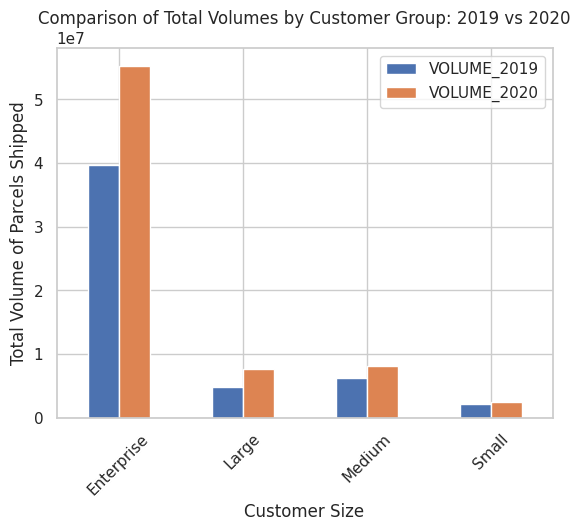

In [115]:
# Calculate total volumes per customerID for each year
total_volumes_2019 = covid_df[covid_df['THE_YEAR'] == 2019].groupby('FakeCustomerID')['VOLUME'].sum()
total_volumes_2020 = covid_df[covid_df['THE_YEAR'] == 2020].groupby('FakeCustomerID')['VOLUME'].sum()

# Create a DataFrame to hold the volume data
volumes = pd.DataFrame({
    'VOLUME_2019': total_volumes_2019,
    'VOLUME_2020': total_volumes_2020
}).fillna(0)  # Fill missing values with 0 if no data is present for that year

# Apply the size categorization based on the larger of the two year's volumes
volumes['Customer_Size'] = volumes[['VOLUME_2019', 'VOLUME_2020']].max(axis=1).apply(get_customer_size)

# Group by customer size and sum volumes for each group for both years
grouped_volumes = volumes.groupby('Customer_Size').sum()

# Display the results
print(grouped_volumes)

# Visualization
grouped_volumes.plot(kind='bar')
plt.title('Comparison of Total Volumes by Customer Group: 2019 vs 2020')
plt.xlabel('Customer Size')
plt.ylabel('Total Volume of Parcels Shipped')
plt.xticks(rotation=45)
plt.show()

In [97]:
import pandas as pd

# Assume data loading and preparation have been done already

# Group the data by customer ID and calculate the total volume for each customer for 2019 and 2020
total_volume_2019 = covid_df[covid_df['THE_YEAR'] == 2019].groupby('FakeCustomerID')['VOLUME'].sum()
total_volume_2020 = covid_df[covid_df['THE_YEAR'] == 2020].groupby('FakeCustomerID')['VOLUME'].sum()

# Calculate the ISGR percentage for each customer from 2019 to 2020
ISGR_2020 = ((total_volume_2020 - total_volume_2019) / total_volume_2019) * 100

# Prepare a DataFrame to hold both periods' data for comparison
ISGR_comparison = pd.DataFrame({
    'VOLUME_2019': total_volume_2019,
    'VOLUME_2020': total_volume_2020,
    'ISGR_2020': ISGR_2020
})

# Calculate the overall ISGR from the aggregated volumes
overall_ISGR = ((ISGR_comparison['VOLUME_2020'].sum() - ISGR_comparison['VOLUME_2019'].sum()) / ISGR_comparison['VOLUME_2019'].sum()) * 100
ISGR_comparison['Overall_ISGR'] = overall_ISGR  # Apply the overall ISGR to all entries for reference

# Save the results to a CSV file
ISGR_comparison.to_csv('ISGR_comparison.csv')

# Print the comparison DataFrame
print(ISGR_comparison)


                VOLUME_2019  VOLUME_2020   ISGR_2020  Overall_ISGR
FakeCustomerID                                                    
100771                 1816       1789.0   -1.486784     39.097612
102180                 5222       4817.0   -7.755649     39.097612
102643                 2670       1703.0  -36.217228     39.097612
102750                 1013        405.0  -60.019743     39.097612
103308                90140     103700.0   15.043266     39.097612
...                     ...          ...         ...           ...
994361                 2608       1658.0  -36.426380     39.097612
994762                 1073        350.0  -67.381174     39.097612
995173                 1632       4920.0  201.470588     39.097612
999141                 3364       3619.0    7.580262     39.097612
999362                 3561       4331.0   21.623140     39.097612

[1061 rows x 4 columns]


In [118]:
# Define the observation period
covid_observation_period = range(13, 54)  # Weeks 13-53 inclusive

# Filter data for the COVID observation period for 2019 and 2020
covid_period_data_2019 = covid_df[(covid_df['THE_YEAR'] == 2019) & (covid_df['THE_WEEK'].isin(covid_observation_period))]
covid_period_data_2020 = covid_df[(covid_df['THE_YEAR'] == 2020) & (covid_df['THE_WEEK'].isin(covid_observation_period))]

# Get total volumes of each customerID for the observation period
total_volumes_2019 = covid_period_data_2019.groupby('FakeCustomerID')['VOLUME'].sum()
total_volumes_2020 = covid_period_data_2020.groupby('FakeCustomerID')['VOLUME'].sum()

# Merge the data into a single DataFrame
customer_volumes = pd.DataFrame({
    'Total_2019': total_volumes_2019,
    'Total_2020': total_volumes_2020
}).fillna(0)  # Replace NaN with 0

# Label customers based on the criteria provided in the table
def label_customer(row):
    if row['Total_2019'] == 0 and row['Total_2020'] > 0:
        return 'New Customer'
    elif row['Total_2019'] > 0 and row['Total_2020'] == 0:
        return 'Lost Customer'
    elif row['Total_2019'] > 0 and row['Total_2020'] > row['Total_2019']:
        return 'High Growth Customer'  # Assuming any positive growth is considered 'High Growth'
    elif row['Total_2019'] > 0 and row['Total_2020'] == row['Total_2019']:
        return 'Stable Customer'
    elif row['Total_2019'] > 0 and row['Total_2020'] < row['Total_2019']:
        return 'Declining Customer'
    else:
        return 'Other'

# Apply the labeling function to each row
customer_volumes['Customer_Category'] = customer_volumes.apply(label_customer, axis=1)

# Get the percentage of each customer group
customer_group_percentages = customer_volumes['Customer_Category'].value_counts(normalize=True) * 100

# Display the customer group percentages
print(customer_group_percentages)


Customer_Category
High Growth Customer    62.983947
Declining Customer      34.655335
Lost Customer            2.360718
Name: proportion, dtype: float64


               Revenue_2019  Revenue_2020  Revenue_Change
Customer_Size                                            
Enterprise        703049468    1046770692       343721224
Large              73909088     136423100        62514012
Medium            107452532     150998276        43545744
Other               3104882        683254        -2421628
Small              41431214      46030600         4599386


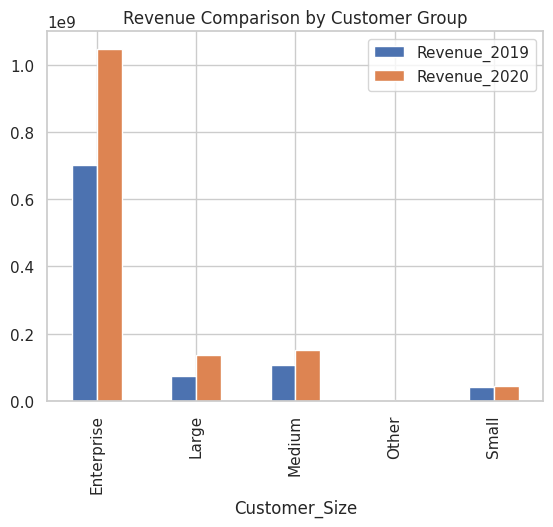

In [117]:
unit_price = 22

# Define the observation period for the COVID-19 impact
observation_weeks = range(13, 54)

# Filter the data for the observation period
data_2019 = covid_df[(covid_df['THE_YEAR'] == 2019) & (covid_df['THE_WEEK'].isin(observation_weeks))]
data_2020 = covid_df[(covid_df['THE_YEAR'] == 2020) & (covid_df['THE_WEEK'].isin(observation_weeks))]

# Sum the volumes for each customer group in both years
grouped_volumes_2019 = data_2019.groupby('Customer_Size')['VOLUME'].sum()
grouped_volumes_2020 = data_2020.groupby('Customer_Size')['VOLUME'].sum()

# Calculate the revenue for each customer group in both years
grouped_revenue_2019 = grouped_volumes_2019 * unit_price
grouped_revenue_2020 = grouped_volumes_2020 * unit_price

# Compare the volumes and revenues by customer group
comparison_df = pd.DataFrame({
    'Revenue_2019': grouped_revenue_2019,
    'Revenue_2020': grouped_revenue_2020
})

# Calculate the change in volume and revenue
comparison_df['Revenue_Change'] = comparison_df['Revenue_2020'] - comparison_df['Revenue_2019']

# Display the comparison dataframe
print(comparison_df)

# Visualization
comparison_df[['Revenue_2019', 'Revenue_2020']].plot(kind='bar', title='Revenue Comparison by Customer Group')
plt.show()
